# **MOBILE PRICE CLASSIFICATIONS**



Texniki xüsusiyyətlərinə əsasən mobilin qiymət sinifini proqnozlaşdırmaq üçün Maşın Lörninq Layihəsi

    Kaggle-da mövzu üçün əldə etdiyimiz bütün dataset i öyrəndik
üzərində işləyəcəyimiz data haqqında bütün vacib məlumatları tapdıq



     1. Data Preprosesinq
      * Datanın təsviri
      * Data haqqında məlumat
      * Atributlar arasında korrelyasiya
      * Qiymət Aralığı ilə ən çox korroleyt olan atributlar (Hədəfimiz|target)
      * non kateqorikin autlayer təhlili
     
   
    Sonra hər biri üçün Maşın Lörninq Alqoritmlərini sınadıq və konfyujn matrisi yaratdıq və ən çox töhfə verən fyuçerlər tapıldı.

     > Logistik reqressiya
     > Desijn tri(cini)
     > Desijn tri (entropiya)


**IMPORTING LIBRARIES**

In [1]:
# 1.0 call libraries for dataframe
import numpy as np
import pandas as pd
import os

#1.1 import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import seaborn as sn

#1.2 import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

#1.3 import required libraries for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split




In [2]:
# 1.4 Display output of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**READIND THE DATASET**


In [3]:
# 2.0 Set datafile path
path = "../input/mobile-price-classifications"
os.chdir(path)

In [4]:
# read the data from csv file

Mpdata = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
#  Look at data

Mpdata.shape                        
print()
Mpdata.head()

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**DATA ANALYSIS**

In [6]:
#Inspecting the Test Dataset

test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Dataset as 21 features and 2000 entries.Fyuçlərin mənaları aşağıda verilmişdir..

1. battery_power: Batareyanın bir dəfədə saxlaya biləcəyi ümumi enerji mAh ilə ölçülür

2. blue: bluetooth var ya yox

3. clock_speed: mikroprosessorun göstərişləri yerinə yetirmə sürəti

4. dual_sim: İkili sim dəstəyi var ya yox

5. fc: Ön kamera meqa piksel

6. four_g: 4G var ya yox

7. int_memory: Gigabaytla daxili yaddaş

8. m_dep: Mobil in qalınlığı

9. mobile_wt: Mobil telefonun çəkisi

10. n_cores: Prosessorun nüvələrinin sayı

11. pc: Əsas Kamera meqa pikselləri

12. px_height: Piksel ayırdetmə hündürlüyü

13. px_width: Piksel ayırdetmə eni

14. ram: Meqa Baytlarda Təsadüfi Giriş Yaddaş

15. sc_h: Mobil ekranın hündürlüyü sm

16. sc_w: Mobil ekranın eni sm

17. talk_time: siz olduğunuz zaman bir batareyanın doldurulmasının davam edəcəyi ən uzun müddət

18. three_g: 3G var ya yox

19. touch_screen:Sensor ekrani var ya yox

20. wifi: Wifi var ya yox

21. price_range: Bu, 0 (aşağı qiymət), 1 (orta qiymət), 2 (yüksək xərc) və 3 (çox yüksək qiymət) dəyəri olan hədəf dəyişəndir..

22. Aşağıdakı cədvəldə ilk 10 giriş göstərilir.



In [7]:
#Display information about our dataset

Mpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
#Display the data types

Mpdata.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
#display the value counts

Mpdata.dtypes.value_counts()

int64      19
float64     2
dtype: int64

In [10]:
# 2.4  Check if there are Missing/duplicate values? None
Mpdata.isnull().sum()            # None
print("\n----------")
Mpdata.isnull().sum().sum()      # None
print("\n------------")
Mpdata.duplicated().sum()        # None

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


----------


0


------------


0

In [11]:
#Nan values in row wise

Mpdata.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
# Reduce Memory usage
print("--Current memory usage (MB) --\n")
Mpdata.memory_usage().sum()//1000000

#
print("\n\n--Max and min values---\n")
Mpdata.max().max()               
print()
Mpdata.min().min()               

#  Change dtype
Mpdata = Mpdata.astype('uint16')

# 
print("\n\n--Revised memory usage (MB) --\n")
Mpdata.memory_usage().sum()//1000000  

--Current memory usage (MB) --



0



--Max and min values---



3998.0

0.0



--Revised memory usage (MB) --



0

In [13]:
# Price range --absolute vs normalized

Mpdata['price_range'].value_counts()
print("\n--normalized--\n")
Mpdata['price_range'].value_counts(normalize=True)

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


--normalized--



1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [14]:
#memory usagr of dataset

Mpdata.memory_usage().sum()

84128

Text(0.5, 1.0, 'Correlation ')

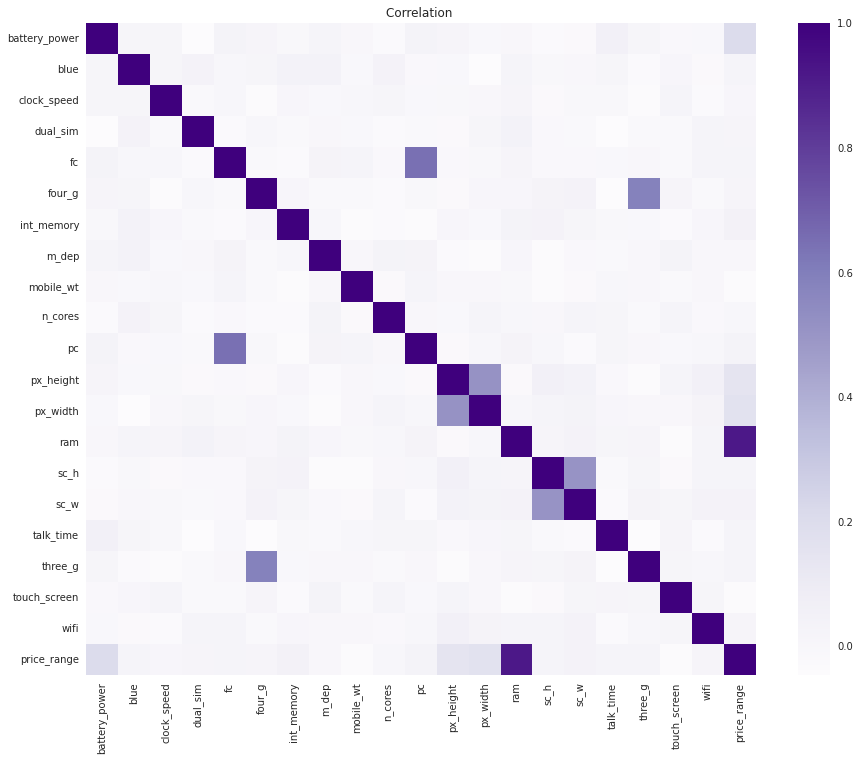

In [15]:
#correlation of data

corr=Mpdata.corr()
fig = plt.figure(figsize=(15,12));
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":


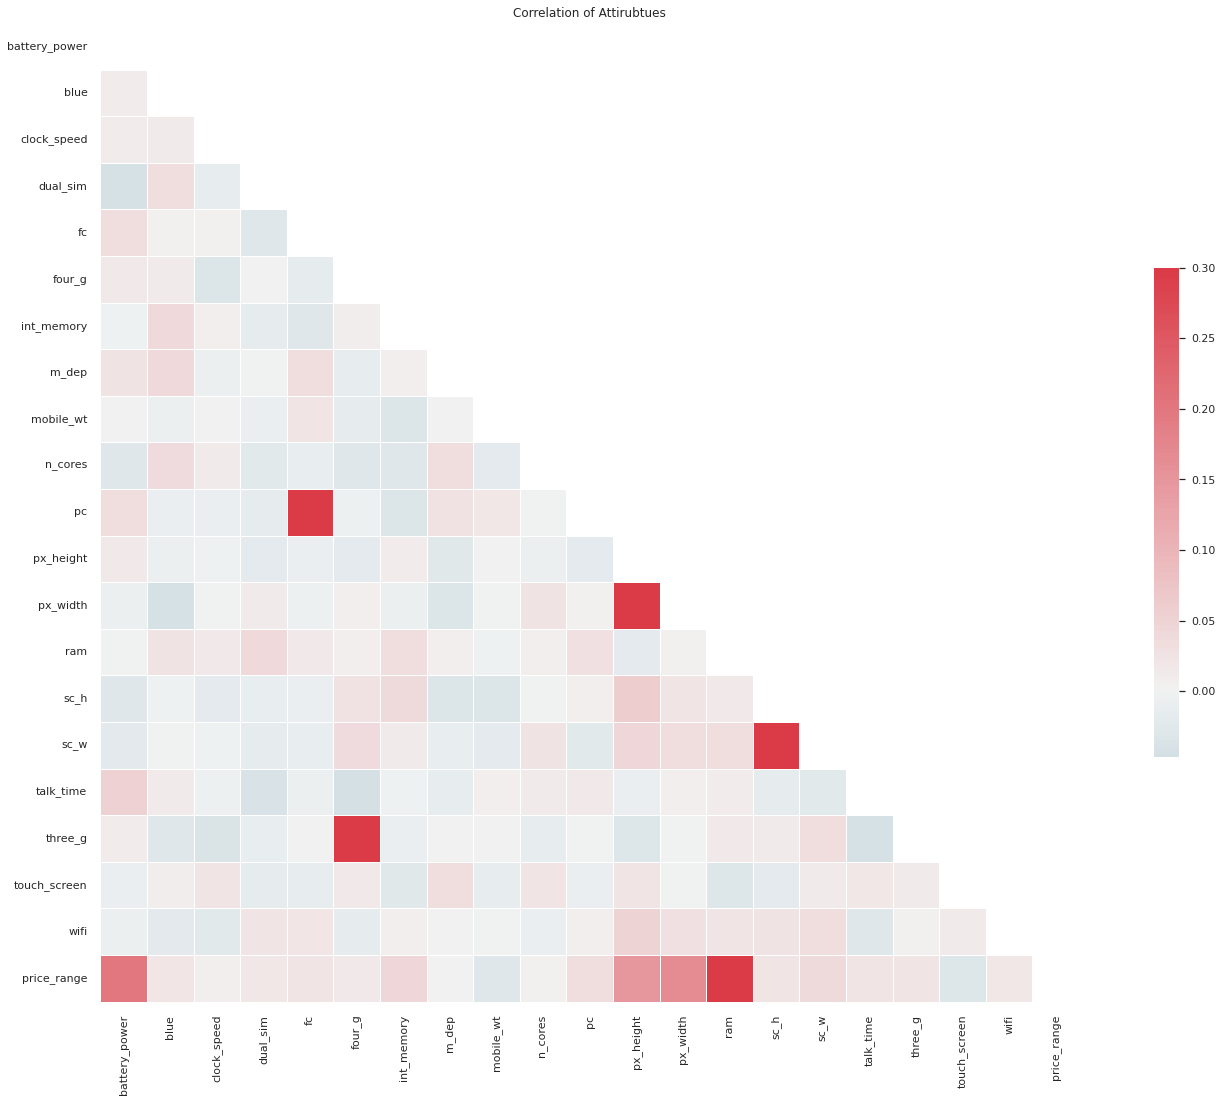

In [16]:
# correlation of data

sns.set(style="white");

# Compute the correlation matrix
corr = Mpdata.corr();

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool);
mask[np.triu_indices_from(mask)] = True;

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title("Correlation of Attirubtues");

Burada aşağıdakıların bir-biri ilə yüksək korrelyasiya olduğunu görə bilərik
1. pc and fc
2. three_g and four_g
3. px_width and px_height

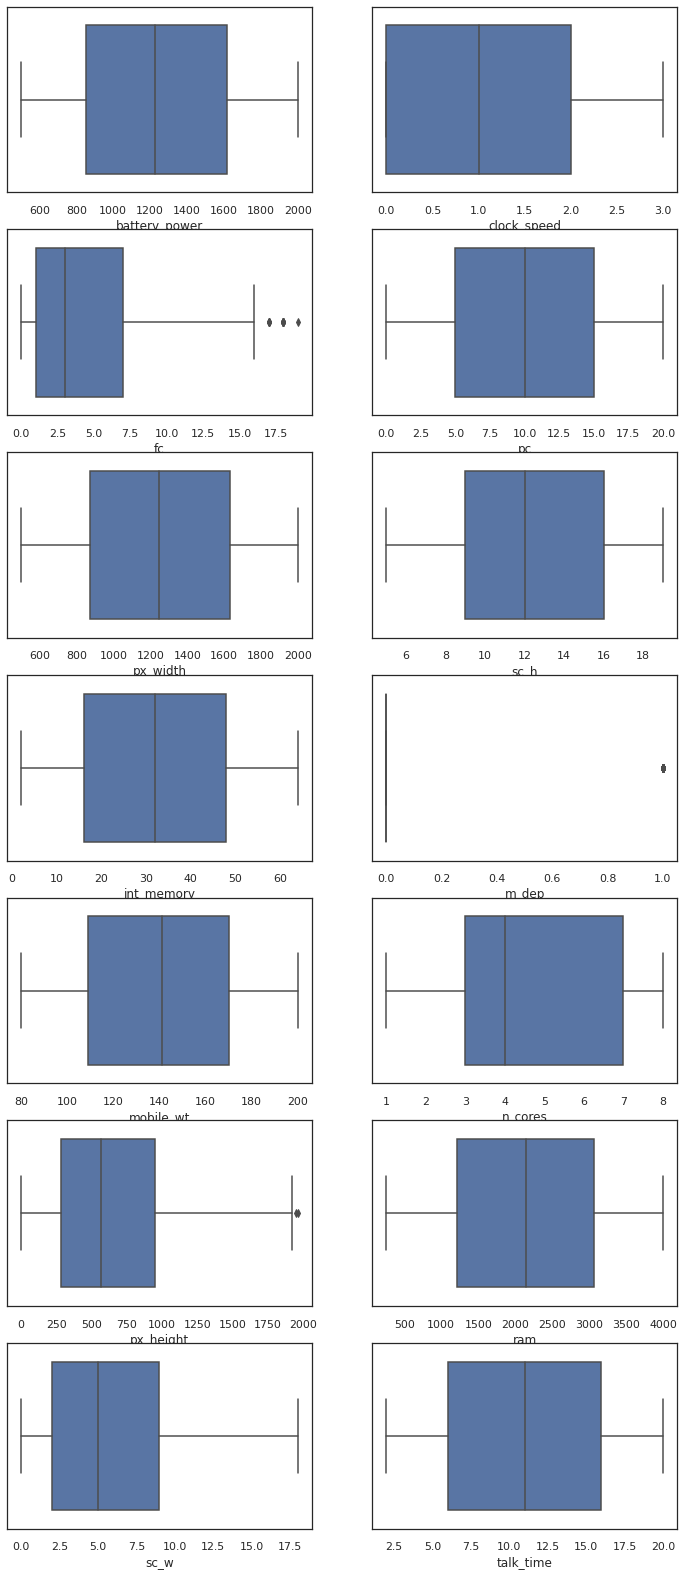

In [17]:
#Outlier Analysis of Non-Categorical Data

fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28)) ;

sns.boxplot(x=Mpdata['battery_power'],ax=ax[0,0]);

sns.boxplot(x=Mpdata['clock_speed'],ax=ax[0,1]);

sns.boxplot(x=Mpdata['fc'],ax=ax[1,0]);

sns.boxplot(x=Mpdata['pc'],ax=ax[1,1]);

sns.boxplot(x=Mpdata['px_width'],ax=ax[2,0]);

sns.boxplot(x=Mpdata['sc_h'],ax=ax[2,1]);

sns.boxplot(x=Mpdata['int_memory'],ax=ax[3,0]);

sns.boxplot(x=Mpdata['m_dep'],ax=ax[3,1]);

sns.boxplot(x=Mpdata['mobile_wt'],ax=ax[4,0]);

sns.boxplot(x=Mpdata['n_cores'],ax=ax[4,1]);

sns.boxplot(x=Mpdata['px_height'],ax=ax[5,0]);

sns.boxplot(x=Mpdata['ram'],ax=ax[5,1]);

sns.boxplot(x=Mpdata['sc_w'],ax=ax[6,0]);

sns.boxplot(x=Mpdata['talk_time'],ax=ax[6,1]);

**Yalnız fc və px_height-da bir neçə autlayerlər var.**

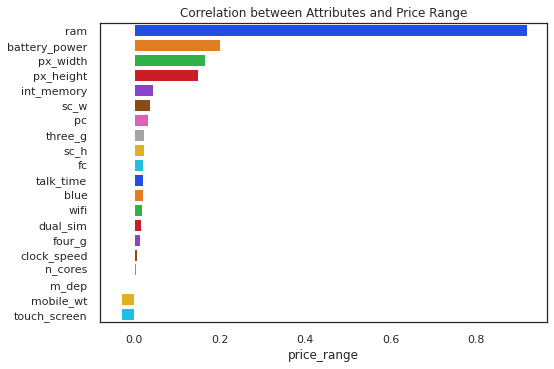

In [18]:
# X fyuçerlərinin oz arasındakı korelyasiyani nəzərə almırıq


corr = Mpdata.corr();
corr = corr.price_range;
cr = corr.sort_values(ascending = False)[1:];
sns.barplot(x=cr, y=cr.index,palette = "bright");
plt.title("Correlation between Attributes and Price Range");

# # **DATA VISUALIZATION**

------------>Analysis of Attributes<------------



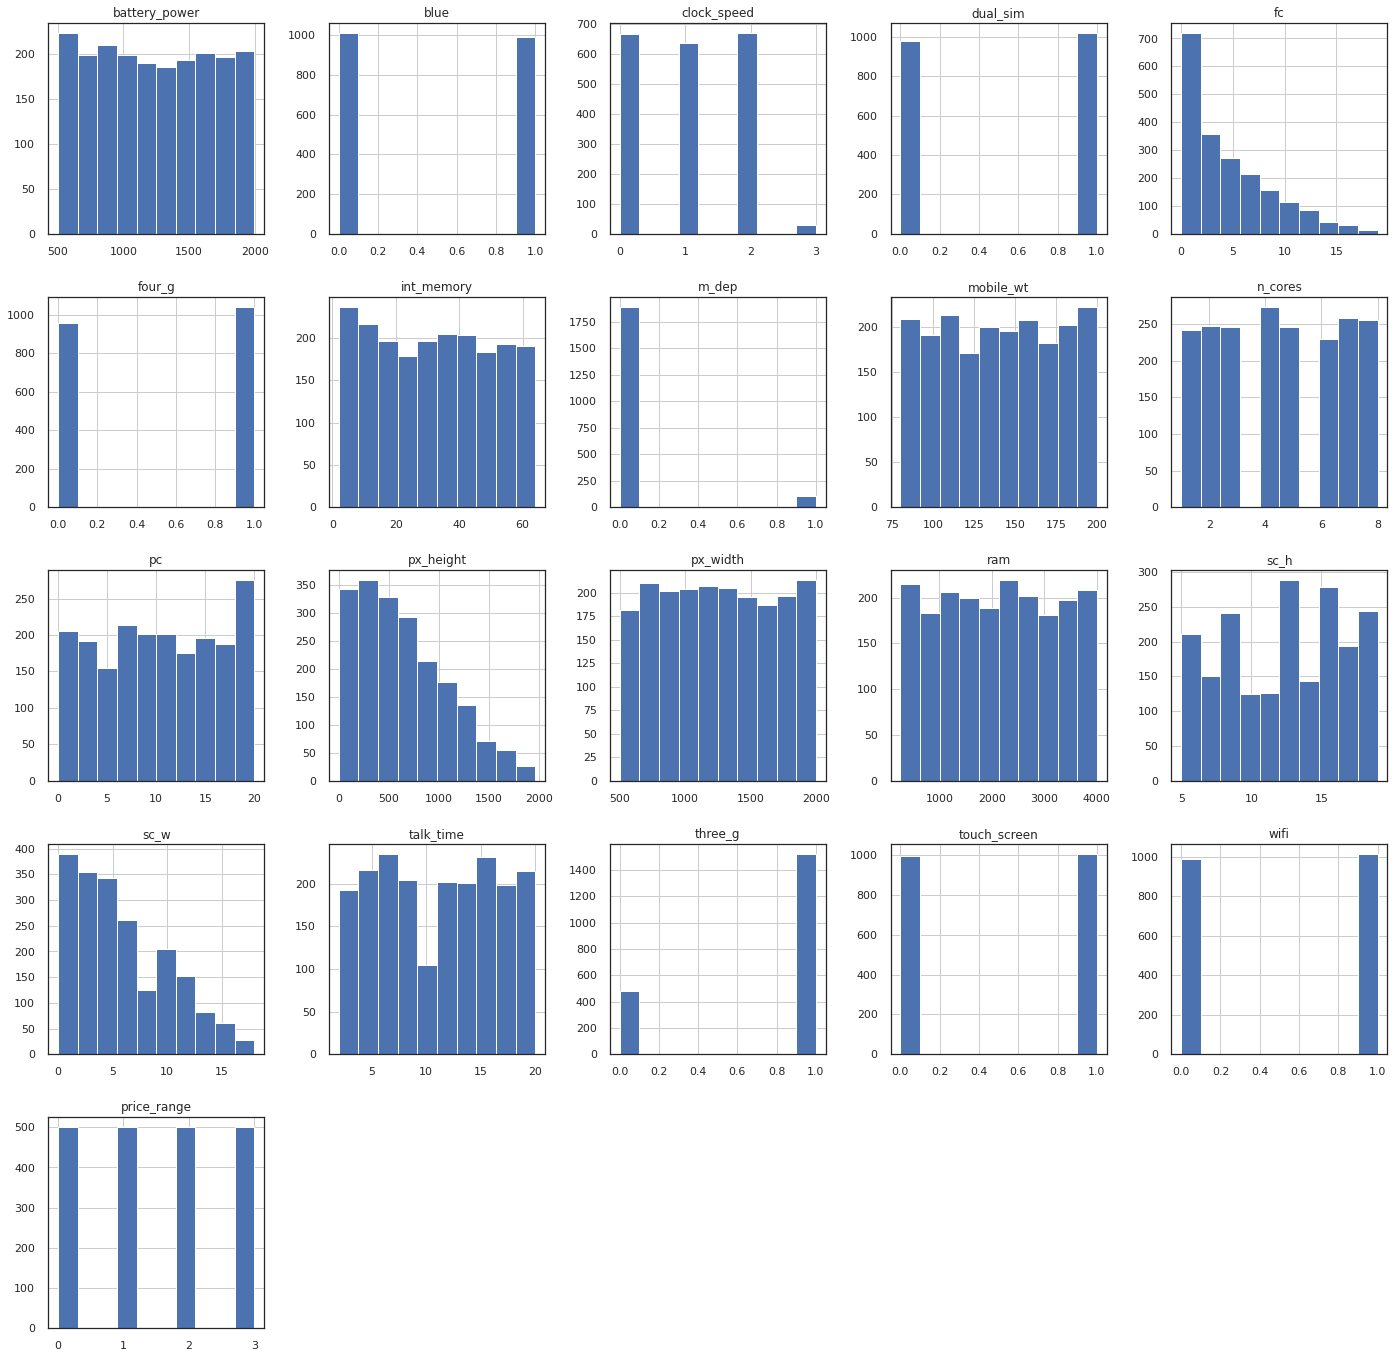

In [19]:
#data visualization drawing histogram

print("------------>Analysis of Attributes<------------")
print()
Mpdata.hist(sharex=False, sharey=False, figsize=(24,24) );
plt.show();




**PRICE RANGE AND RAM**

<AxesSubplot:xlabel='price_range', ylabel='ram'>

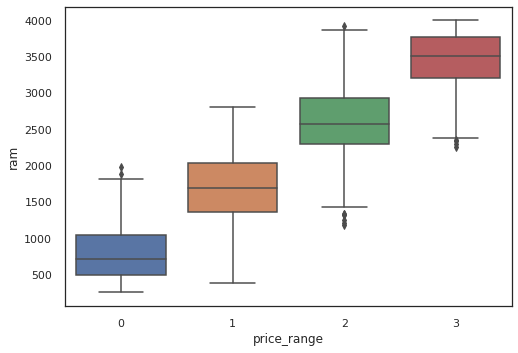

In [20]:
# analysing RAM with price_range

df= Mpdata[['price_range']].groupby(Mpdata['ram']).sum()
df.reset_index(inplace=True)
sns.boxplot(data= df, x=Mpdata['price_range'], y=Mpdata['ram'])

        here the less RAM having less price

**PRICE RANGE AND BATTERY POWER**

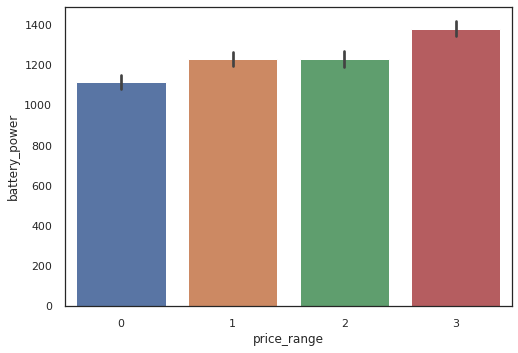

In [21]:
#battery_power vs price_range

PB= Mpdata[['price_range']].groupby(Mpdata['battery_power']).sum()
PB.reset_index(inplace = True)
sns.barplot(data = PB, x = Mpdata['price_range'],y = Mpdata['battery_power']);


burada batareya tutumu qiyməti artırır

**PRICE RANGE AND TOUCH SCREEN**

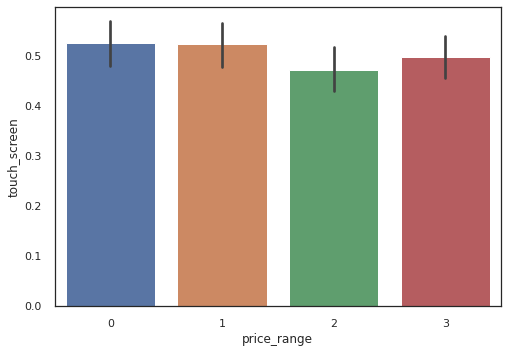

In [22]:
# Touch_screen feature with price_range

TP= Mpdata[['price_range']].groupby(Mpdata['touch_screen']).sum()
Mpdata.reset_index(inplace = True)
sns.barplot(data = TP, x = Mpdata["price_range"],y = Mpdata["touch_screen"]);

burada Touch_screen ölçüsü 2 qiymət intervalında daha kiçik və 1 qiymət intervalında daha böyük

**N_CORES AND BATTERY POWER**

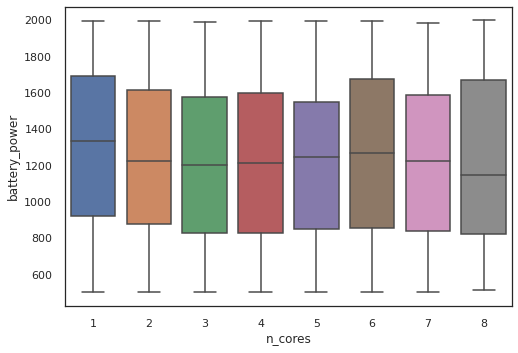

In [23]:
#comparing battery power with n_cores

sn.boxplot(data=Mpdata, x=Mpdata['n_cores'], y=Mpdata['battery_power']);

burada batareya gücü maksimum 8 nüvə ilə

**BATTERY POWER AND CLOCK SPEED**

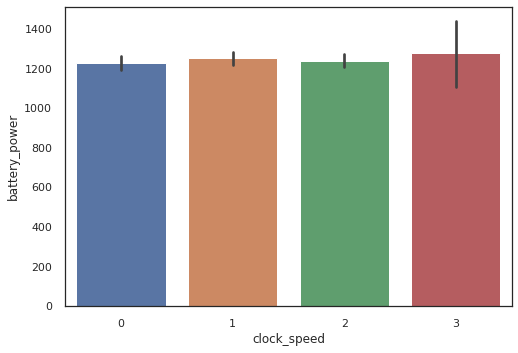

In [24]:
# Bar chat for Battery_power and clock_speed

BCP= Mpdata[['clock_speed']].groupby(Mpdata['battery_power']).sum()
BCP.reset_index(inplace = True)
sns.barplot(data = BCP,x = Mpdata['clock_speed'],y = Mpdata['battery_power']);

###**PRICE RANGE AND DIFFERENT FEATURES OF MOBILE**

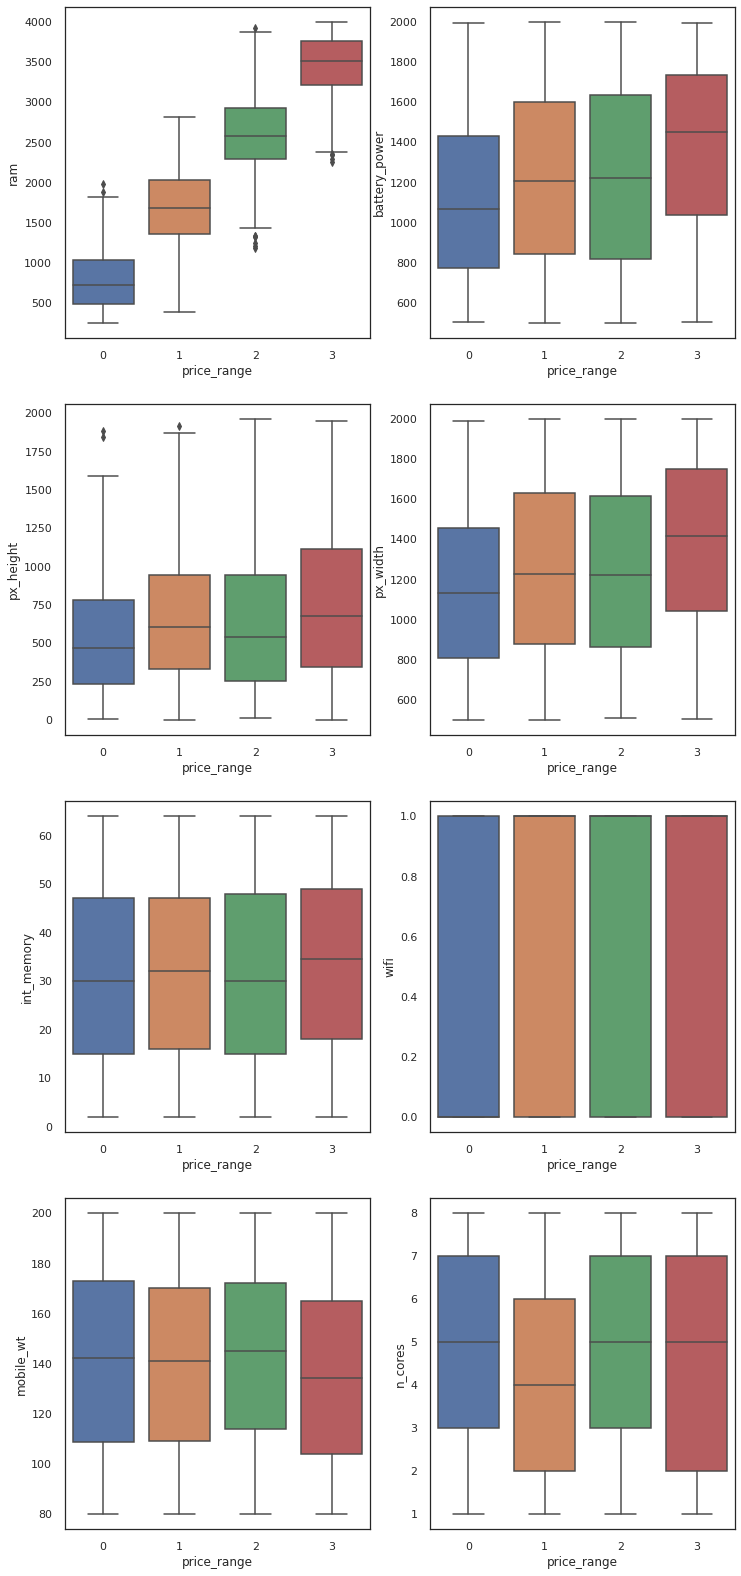

In [25]:
#Box plots for price range comparing with features

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.boxplot(x='price_range',y='ram',data=Mpdata,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=Mpdata,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_height',data=Mpdata,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_width',data=Mpdata,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=Mpdata,ax=ax[2,0]);
sns.boxplot(x='price_range',y='wifi',data=Mpdata,ax=ax[2,1]);
sns.boxplot(x='price_range',y='mobile_wt',data=Mpdata,ax=ax[3,0]);
sns.boxplot(x='price_range',y='n_cores',data=Mpdata,ax=ax[3,1]);

**BATTERY POWER- RAM AND PRICE RANGE scatter**

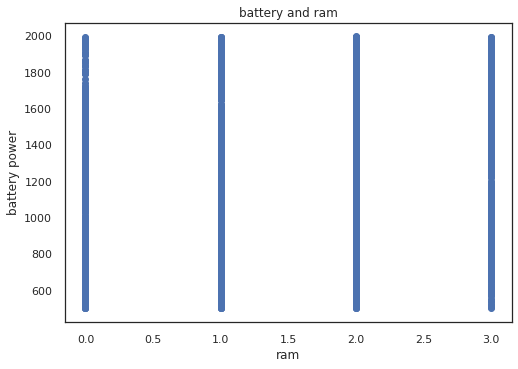

In [26]:
#scatter plot for battery power RAM and Price range

plt.scatter(x=Mpdata['price_range'], y=Mpdata['battery_power'],cmap='Spectral'); # c = color, cmap = color map
plt.xlabel('ram');
plt.ylabel('battery power');
plt.title('battery and ram');


     skatter plot batareya gücünü və ram dəyərlərini göstərir

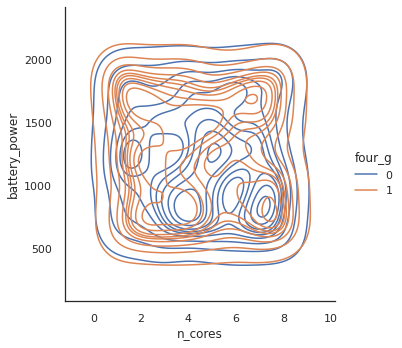

In [27]:
# 2.6 kde plot with 3 features

sns.displot(kind='kde',data=Mpdata, x='n_cores', y='battery_power',hue='four_g');

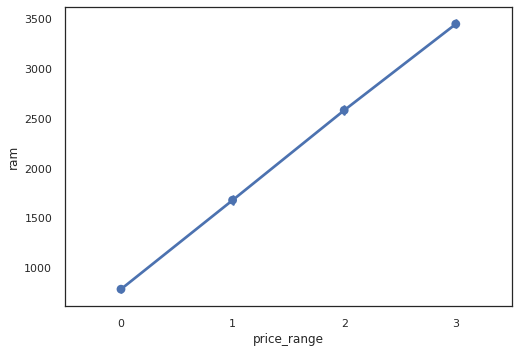

In [28]:
#  Relationship between RAM and Price Range
sns.pointplot(y='ram',x='price_range',data=Mpdata);

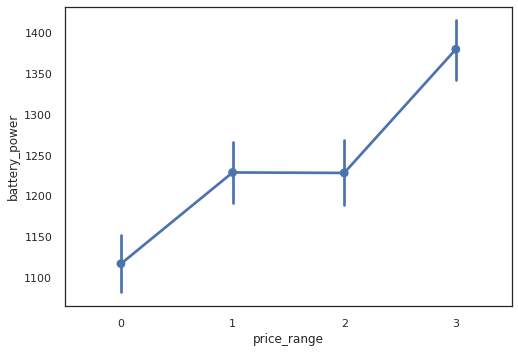

In [29]:
#point plot-da batareya və qiymət diapazonu arasındakı əlaqə

sns.pointplot(y='battery_power',x='price_range',data=Mpdata);

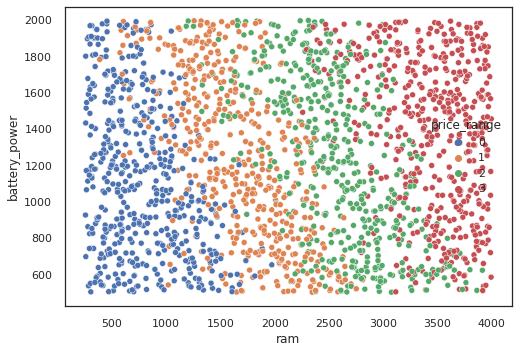

In [30]:
# Qiymət diapazonuna görə RAM və Batareya gücünün səpələnmə qrafiki(skatter plot)

sns.scatterplot(data=Mpdata, x="ram", y="battery_power",hue="price_range",palette="deep");

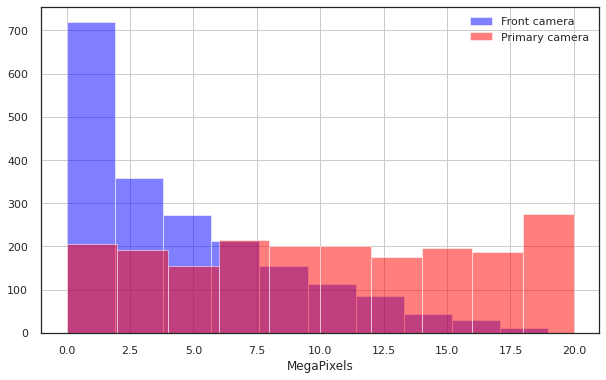

In [31]:
#Meqapikselə görə telefonların sayı

plt.figure(figsize=(10,6))
Mpdata['fc'].hist(alpha=0.5,color='blue',label='Front camera');
Mpdata['pc'].hist(alpha=0.5,color='red',label='Primary camera');
plt.legend();
plt.xlabel('MegaPixels');

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


<Figure size 720x1440 with 0 Axes>

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


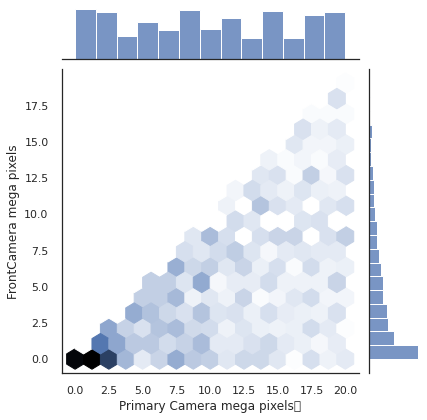

In [32]:
#Mobil Kamera Meqapiksellərinin Joint Plot u

plt.figure(figsize=(10,20));
sns.jointplot(x=Mpdata['pc'], y=Mpdata['fc'], kind="hex");
plt.xlabel("Primary Camera mega pixels	");
plt.ylabel("FrontCamera mega pixels");

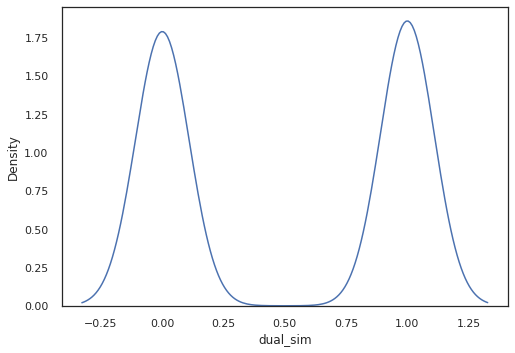

In [33]:
#Telefonun neçə nömrəli iki simli olduğunu göstərin.

sns.kdeplot(data=Mpdata, x=Mpdata['dual_sim']);

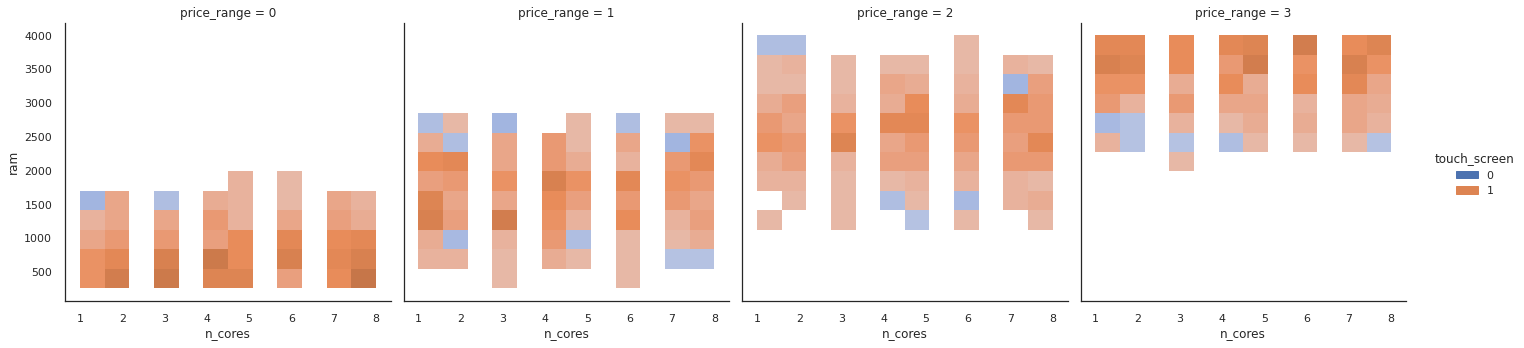

In [34]:
sns.displot(kind='hist',data=Mpdata, x='n_cores', y='ram', hue='touch_screen', col='price_range');

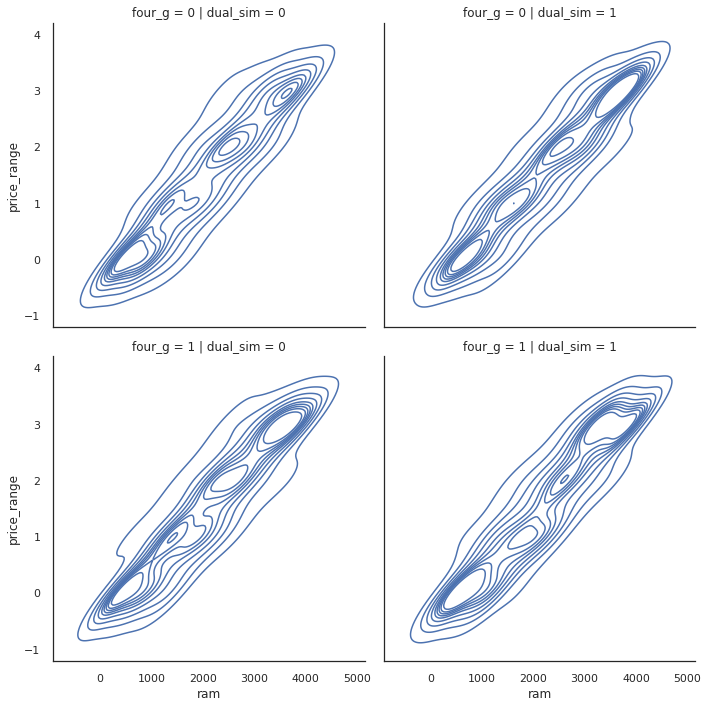

In [35]:
sns.displot(kind='kde',
    data=Mpdata,x='ram', y="price_range", col="dual_sim", row="four_g"
);

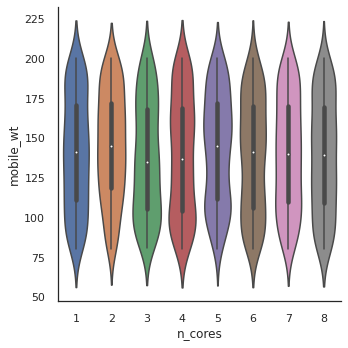

In [36]:
sns.catplot(kind='violin',data=Mpdata, y='mobile_wt', x='n_cores');

# # **CLUSTERING**

In [37]:
#creating clustering

X = Mpdata.drop('price_range',axis=1)
Y = Mpdata['price_range']

In [38]:
#shape of x cluster
X.shape

(2000, 21)

In [39]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: uint16

###**STANDART SCALAR istifadə edərək məlumatların miqyası(scale)**

In [40]:
# instantiate scalar

std = StandardScaler()

#fit the data

std.fit(X)

#transfotm the data

Mpdata_scaled = std.transform(X)

StandardScaler()

In [41]:
#shape of train data

Mpdata_scaled.shape

(2000, 21)

In [42]:
Mpdata_scaled

array([[-1.731185  , -0.90259726, -0.9900495 , ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-1.72945295, -0.49513857,  1.0100505 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.7277209 , -1.5376865 ,  1.0100505 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.7277209 ,  1.53077336, -0.9900495 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 1.72945295,  0.62252745, -0.9900495 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [ 1.731185  , -1.65833069,  1.0100505 , ...,  0.55964063,
         0.99401789,  0.98609664]])

###**KMeans Class təhlili**

In [43]:
#   Instantiate KMeans class
#   with default values of parameters:
#   We fix number of clusters as: 5

kmeans = KMeans(n_clusters = 5,max_iter=300)


In [44]:
# Fit KMeans in scaled data

kmeans.fit(Mpdata_scaled)

KMeans(n_clusters=5)

In [45]:
#check number of iterations
#təkrarların sayını yoxlamaq

kmeans.n_iter_

24

In [46]:
#fit zamanı fyuçerlərin sayını yoxlamaq

kmeans.n_features_in_

21

**Klaster mərkəzlərinin koordinatları**

In [47]:
# Get cluster centers (centroids) now:
#klaster merkezlerini (centroidler) alırıq
kmeans.cluster_centers_

array([[ 2.29578461e-02,  1.00802518e-01,  1.79820312e-01,
        -3.41020982e-02, -1.32099318e-04,  1.30832170e-01,
        -6.19252009e-02,  2.18781949e-02,  4.22704679e+00,
         8.69163003e-03,  1.31272397e-01,  1.16471212e-01,
        -1.06688374e-01, -1.45336198e-01,  3.06075236e-02,
        -1.44434740e-01, -5.26401649e-02, -6.24591520e-02,
         6.22044292e-03,  1.44946005e-01,  4.86840166e-03],
       [ 5.02032365e-02,  5.92069790e-02,  3.26615658e-03,
         1.93494664e-02, -5.53298533e-03,  3.40612157e-01,
         3.04082601e-01, -1.11510453e-01, -2.36571784e-01,
         1.41950075e-01, -9.58145333e-02,  3.43930850e-01,
        -4.27066852e-01, -2.87218700e-01,  6.85804934e-02,
        -6.44298192e-01, -6.19081980e-01,  1.28965992e-01,
         5.59640631e-01, -1.61012999e-02, -1.52062041e-01],
       [-5.25499308e-02, -2.72270811e-02,  3.87100695e-02,
         6.71745504e-02, -1.90034304e-02, -1.86505342e-01,
         3.59246152e-01,  1.06628205e-01, -2.36571784e

In [48]:
# Hansı remark hansı klasterə düşür?

kmeans.labels_

array([4, 3, 3, ..., 3, 2, 2], dtype=int32)

**SSE value**

In [49]:
#SSE və ya klasterdaxili fərq

kmeans.inertia_

34744.160148605195

finding the silhoutte score

In [50]:
# Initialize an empty list :
#Boş siyahı ilə başlayırıq
sse = []
s_score = []
max_k=7

#Değişken klaster sayı
#  Vary number of clusters

for num_clusters in range(2,max_k):

# Initialise KMeans  

  model = KMeans(n_clusters =num_clusters,max_iter = 50)
   
# 'train' the instantiated object

  model.fit(Mpdata_scaled)

#  Calculate inertia and append it to sse

  sse.append(model.inertia_)   

# silhouette_score

  sc=silhouette_score(Mpdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)
 

KMeans(max_iter=50, n_clusters=2)

KMeans(max_iter=50, n_clusters=3)

KMeans(max_iter=50, n_clusters=4)

KMeans(max_iter=50, n_clusters=5)

KMeans(max_iter=50, n_clusters=6)

In [51]:
sse

[39299.6851154974,
 37418.588344666954,
 36213.57403503591,
 34509.69786691455,
 33689.69064762906]

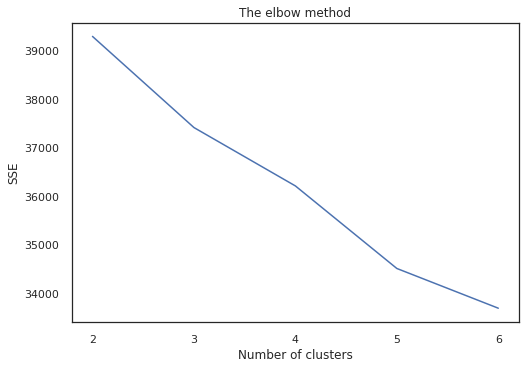

In [52]:
#  Plot the results onto a line graph:for sse

plt.plot(range(2, max_k), sse);
plt.xticks(range(2,max_k));
plt.title('The elbow method');
plt.xlabel('Number of clusters');
plt.ylabel('SSE'); # Sum of squared errors
plt.show();

**optimal silhoutte score**

In [53]:
# display silhoutte score

s_score

[0.06693380960134705,
 0.0703932656282442,
 0.05512534957345872,
 0.06246040601565278,
 0.05740361857343562]

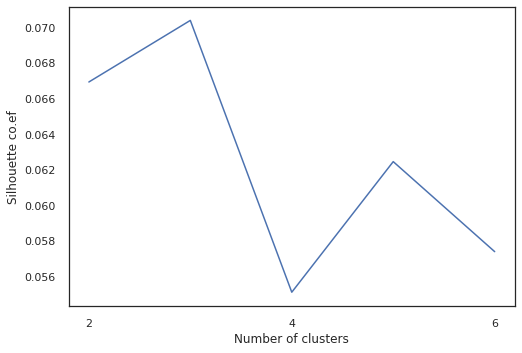

In [54]:
#Silhouette score plot

plt.plot(range(2,max_k), s_score)
plt.xticks(range(2,max_k,2))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette co.ef")
plt.show();

In [55]:
#checking number of labels

cluster_labels = kmeans.labels_

In [56]:
#siluet xal
#silhoutte score

sc= silhouette_score(Mpdata_scaled, cluster_labels)
print("The sample_silhouette_values:")

The sample_silhouette_values:


In [57]:
sc

0.05876093523581815

# # **Silhoutte plot**

In [58]:
#silhoutte plotting

visualizer = SilhouetteVisualizer( model,
                                  colors='yellowbrick')

In [ ]:
#6 mərkəzdə 2000 nümunə üçün klasterləşən kmeanların siluet planı

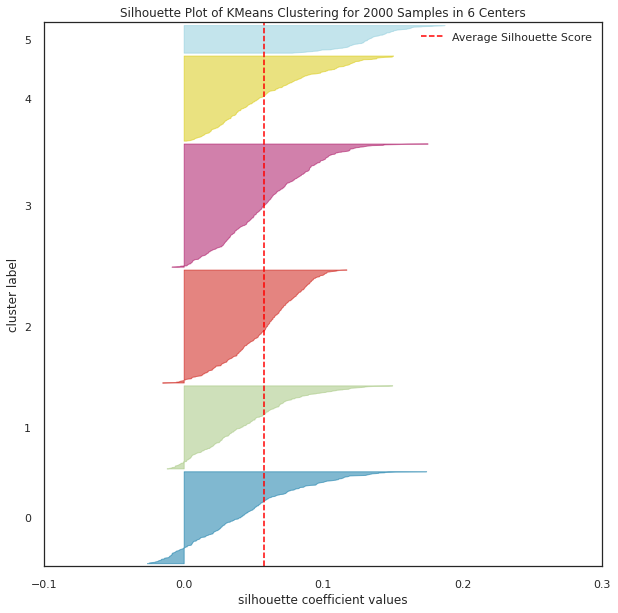

In [59]:
## 

fig = plt.figure(figsize= (10,10))
_= visualizer.fit(Mpdata_scaled);        # Fit the data to the visualizer
_= visualizer.show()        # Finalize and render the figure



# # **CLASSIFICATION AND MODELIND**

In [60]:
#create a dataframe

X = Mpdata.iloc[:,1:-1].values
Y = Mpdata.iloc[: , -1]

In [61]:
X

array([[ 842,    0,    2, ...,    0,    0,    1],
       [1021,    1,    0, ...,    1,    1,    0],
       [ 563,    1,    0, ...,    1,    1,    0],
       ...,
       [1911,    0,    0, ...,    1,    1,    0],
       [1512,    0,    0, ...,    1,    1,    1],
       [ 510,    1,    2, ...,    1,    1,    1]], dtype=uint16)

In [62]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: uint16

In [ ]:
#Məlumatları standartlaşdırırıq
#Obyektin başlanğıcı
#Məlumatları çevirmək

In [63]:
# Standardize data:

# Instantiate object
ss = StandardScaler()

# Train object on data
ss.fit(X)

# Trandform data
X = ss.transform(X)

StandardScaler()

In [64]:
# Split X and y into train and test data:

X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )


In [65]:
# About train data:
                                   
X_train.shape  
print()

(1400, 20)

In [66]:
# Test data:

X_test.shape   
print()

(600, 20)

In [67]:
X_train

array([[ 0.10125348,  1.0100505 , -0.0341021 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.39270482, -0.9900495 ,  2.31776674, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 0.68854031,  1.0100505 , -0.0341021 , ...,  0.55964063,
         0.99401789,  0.98609664],
       ...,
       [ 1.45565528,  1.0100505 , -1.21003652, ..., -1.78686097,
        -1.00601811, -1.01409939],
       [-1.65605439, -0.9900495 , -1.21003652, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.61499666, -0.9900495 ,  1.14183232, ..., -1.78686097,
         0.99401789, -1.01409939]])

In [68]:
Y_train

268     2
1731    0
1817    1
712     2
1858    2
       ..
1869    3
1276    2
858     1
1738    1
471     3
Name: price_range, Length: 1400, dtype: uint16

In [69]:
X_test

array([[-0.75008478,  1.0100505 , -1.21003652, ...,  0.55964063,
         0.99401789,  0.98609664],
       [ 0.46318606, -0.9900495 , -0.0341021 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.19238993, -0.9900495 , -0.0341021 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       ...,
       [-1.17120131, -0.9900495 ,  1.14183232, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [-0.13320599,  1.0100505 ,  1.14183232, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.95722859, -0.9900495 , -0.0341021 , ...,  0.55964063,
         0.99401789,  0.98609664]])

In [70]:
Y_test

1178    0
233     1
1475    1
1274    1
1271    3
       ..
612     3
1919    0
241     2
1443    0
994     0
Name: price_range, Length: 600, dtype: uint16

# # **CREATE DECISION TREE**

**DECISION TREE MODELING**
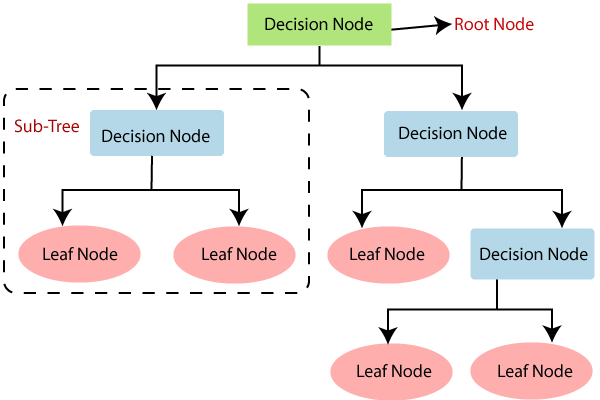

**Decision tree classification**

In [71]:
# Start modeling
# Initialize our decision tree object.
#     Supply relevant parameters

dtc = DecisionTreeClassifier(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [72]:
# Train our decision tree:

dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

## **DATANI PROQNOZLAMA(PREDICTION)**

In [73]:
# Test datasının təxminləri

Y_pred = dtc.predict(X_test)

In [74]:
Y_pred

array([0, 1, 1, 1, 3, 2, 3, 3, 1, 3, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 3, 3,
       2, 3, 0, 3, 3, 0, 3, 3, 0, 2, 3, 1, 0, 2, 3, 0, 0, 1, 3, 1, 0, 0,
       3, 2, 2, 1, 0, 0, 0, 1, 0, 1, 3, 2, 2, 2, 0, 0, 1, 0, 0, 2, 3, 2,
       1, 1, 3, 2, 0, 0, 1, 0, 3, 1, 1, 0, 2, 2, 0, 3, 3, 1, 3, 1, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 3, 1, 2, 2, 3, 3, 3, 2, 3, 0, 1,
       3, 3, 0, 2, 1, 0, 1, 0, 3, 2, 3, 0, 1, 1, 2, 0, 2, 3, 2, 1, 0, 1,
       0, 0, 2, 3, 0, 3, 3, 0, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 3, 3, 2, 1, 1, 0, 1, 0, 2, 0, 3, 0, 0, 3, 2,
       3, 1, 0, 3, 3, 2, 3, 0, 3, 1, 3, 3, 3, 1, 0, 1, 0, 3, 1, 3, 2, 2,
       3, 3, 1, 1, 0, 3, 2, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 0, 3, 1, 2, 0,
       1, 2, 1, 3, 0, 3, 2, 3, 0, 1, 2, 3, 1, 3, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 3, 0, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 0,
       0, 0, 1, 3, 0, 3, 2, 0, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 0,
       1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 1, 0, 2, 2, 0,

In [75]:
Y_test

1178    0
233     1
1475    1
1274    1
1271    3
       ..
612     3
1919    0
241     2
1443    0
994     0
Name: price_range, Length: 600, dtype: uint16

In [76]:
# Dəqiqliyi əldə edirik:

from sklearn.metrics import accuracy_score

dt_ac = accuracy_score(Y_test,Y_pred)

In [77]:
dt_ac

0.845

## **PLOT THE DECISION TREE**

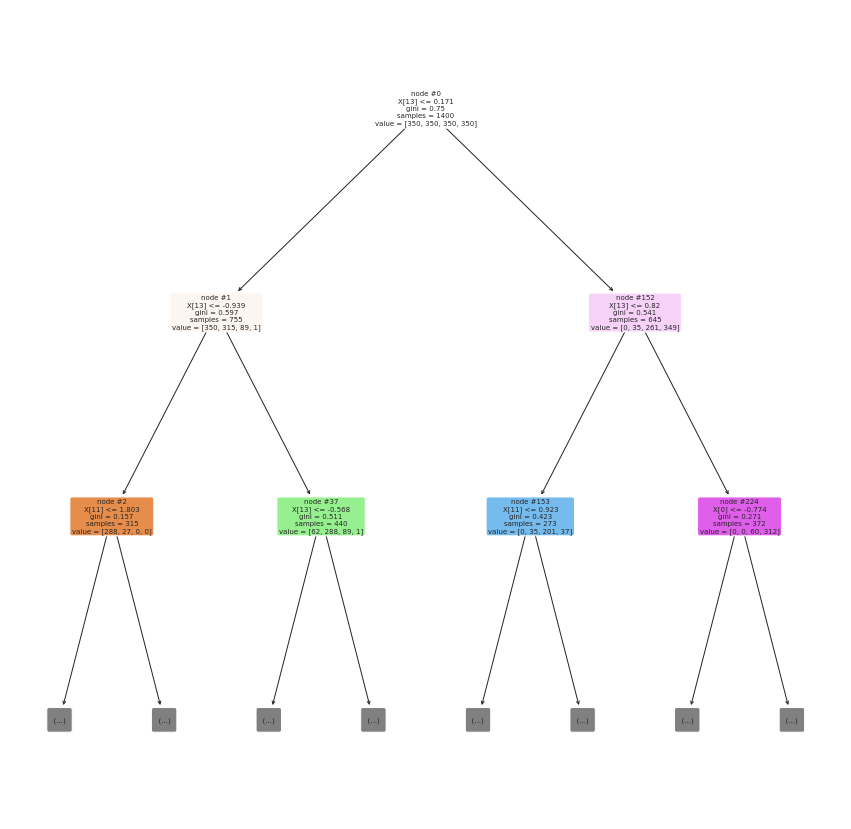

In [78]:
# Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

_=plt.figure(figsize=(15,15))
_=plot_tree(
            dtc,
            max_depth = 2,  # Draw upto depth of 2
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
                        )

_=plt.show()

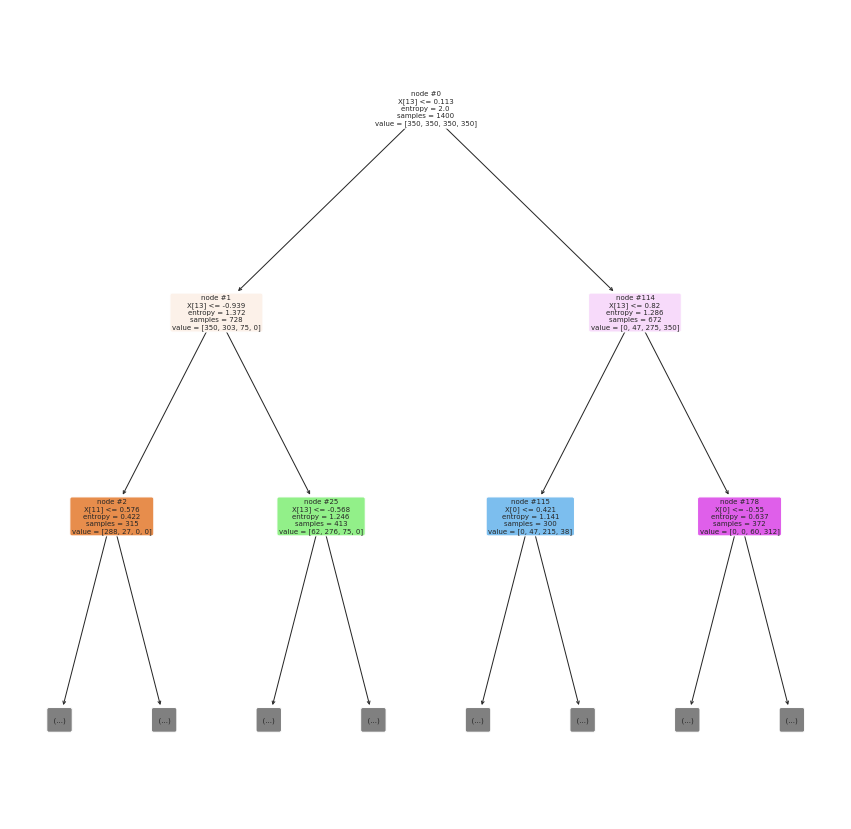

In [79]:
# Plot decision tree with 'entropy' as criterion:

dtc = DecisionTreeClassifier(
           criterion="entropy",    # Alternative 'entropy'
           max_depth =None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 
_=dtc.fit(X_train,Y_train)

# 
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dtc,
            max_depth = 2,  # Draw upto depth of 2
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
                        )

_=plt.show()

In [80]:
# Test datasına dair proqnozlar verir

y_te = dtc.predict(X_test)
dt_ac=accuracy_score(Y_test,Y_pred)/Y_test.size


In [81]:
y_te

array([0, 1, 1, 1, 3, 2, 3, 3, 1, 3, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 3, 3,
       2, 3, 1, 3, 2, 1, 3, 3, 0, 3, 3, 1, 0, 2, 3, 0, 0, 1, 3, 1, 0, 0,
       3, 2, 1, 1, 1, 0, 0, 1, 0, 2, 3, 2, 3, 3, 0, 0, 1, 0, 0, 2, 3, 2,
       1, 1, 3, 2, 0, 0, 1, 0, 3, 1, 2, 0, 2, 2, 0, 2, 3, 1, 3, 1, 2, 2,
       1, 1, 0, 0, 3, 2, 0, 1, 0, 1, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 0, 2,
       3, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 0, 1, 2, 2, 0, 2, 3, 2, 1, 1, 2,
       0, 0, 2, 3, 1, 3, 2, 0, 1, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 1, 1, 0, 0, 3, 3, 2, 1, 1, 0, 1, 0, 3, 0, 3, 0, 0, 3, 2,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 1, 3, 2, 3, 1, 0, 0, 0, 2, 2, 3, 2, 1,
       3, 3, 1, 1, 0, 3, 2, 0, 1, 1, 2, 3, 2, 3, 2, 2, 1, 0, 3, 1, 2, 0,
       1, 2, 1, 2, 0, 3, 2, 3, 1, 1, 1, 3, 1, 3, 0, 0, 0, 2, 0, 1, 2, 3,
       2, 1, 3, 0, 1, 2, 1, 2, 3, 2, 1, 0, 1, 3, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 3, 0, 3, 2, 0, 1, 3, 1, 3, 2, 1, 2, 2, 3, 1, 1, 3, 2, 0,
       1, 1, 3, 1, 0, 2, 3, 2, 1, 0, 0, 1, 3, 2, 0,